### NSMC (Naver Sentiment Movie Corpus)
https://github.com/e9t/nsmc  
파일 다운로드 ("ratings_train.txt", "ratings_test.txt")

In [4]:
# 파일 읽어오는 함수
def readFile(path):
    with open(path, encoding='utf-8') as f:
        doc = []
        for line in f.read().splitlines()[1:]:
            doc.append(line.split('\t')[1])
    return doc

In [5]:
train = readFile('ratings_train.txt')

In [7]:
test = readFile('ratings_test.txt')

In [8]:
len(train), len(test)

(150000, 50000)

In [9]:
train[:5]

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다']

In [10]:
# 전처리 함수
def preprocessing(txt):
    import re
    txt = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]', '', txt)
    sw = set()
    with open('stopwords-ko.txt', encoding='utf-8') as f:
        for word in f:
            sw.add(word.replace('\n', ''))
    tokens = []
    from eunjeon import Mecab
    mecab = Mecab()
    for t in mecab.morphs(txt):
        if t not in sw and len(t) > 1:
            tokens.append(t)    
    return tokens

In [11]:
# nsmc 텍스트 전처리 함수 
def make(data):
    result = []
    for line in data:
        v = preprocessing(line)
        if v:
            result.append(v)
    return result

In [13]:
train_data = make(train)

In [16]:
train_data[:5]

[['진짜', '짜증', '네요', '목소리'],
 ['포스터', '보고', '초딩', '영화', '오버', '연기', '가볍', '구나'],
 ['너무', '밓었', '추천', '한다'],
 ['교도소', '이야기', '구먼', '솔직히', '재미', '평점', '조정'],
 ['사이몬페그',
  '익살',
  '스런',
  '연기',
  '돋보였',
  '영화',
  '스파이더맨',
  '보이',
  '커스틴',
  '던스트',
  '너무나',
  '이뻐',
  '보였']]

In [17]:
import nltk
tokens = [token for doc in train_data for token in doc]
tokens[:5]

['진짜', '짜증', '네요', '목소리', '포스터']

In [19]:
# 가장 출현빈도가 높은 10개 단어 출력
text = nltk.Text(tokens)
text.vocab().most_common(10)

[('영화', 57567),
 ('는데', 11402),
 ('너무', 11013),
 ('정말', 9780),
 ('네요', 8990),
 ('재밌', 8985),
 ('진짜', 8350),
 ('ㅋㅋ', 7231),
 ('연기', 6823),
 ('최고', 6554)]

In [ ]:
# 폰트 경로 찾는 법
import matplotlib.font_manager as fm
for font in fm.fontManager.ttflist:
    if 'Coding' in font.name:
        print(font.fname)

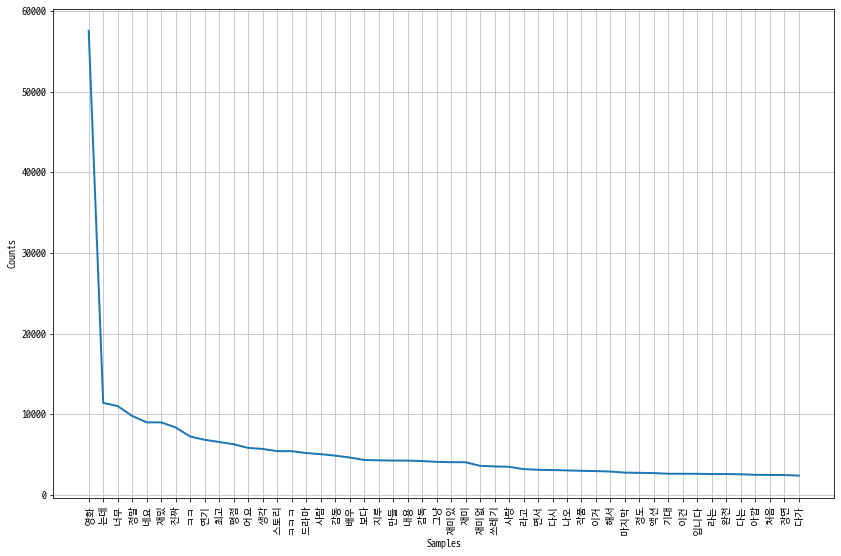

In [45]:
# 그래프
# 한글처리
from matplotlib import font_manager, rc
# fm = font_manager.FontProperties(fname='C:\Windows\Fonts\HMFMPYUN.TTF')
# rc('font', family=fm.get_name())
fm = font_manager.FontProperties(fname='C:\\Users\\tjoeun-jr-902-02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding-Ver1.3.2-20180524-all.ttc')
rc('font', family='D2Coding')
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 9))
text.plot(50)
plt.show()

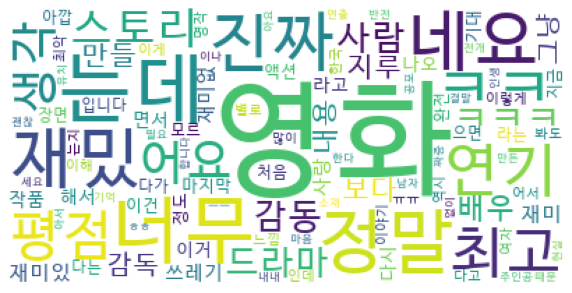

In [63]:
# 워드클라우드
from wordcloud import WordCloud
# wc = WordCloud(font_path='C:\Windows\Fonts\HMFMPYUN.TTF', 
wc = WordCloud(font_path='C:\\Users\\tjoeun-jr-902-02\\AppData\\Local\\Microsoft\\Windows\\Fonts\\D2Coding-Ver1.3.2-20180524-all.ttc',
              background_color='white',
              max_font_size=90, min_font_size=8
              ).generate_from_frequencies(dict(text.vocab().most_common(100)))
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')
plt.show()

C:\Users\tjoeun-jr-902-02\AppData\Local\Microsoft\Windows\Fonts\D2Coding-Ver1.3.2-20180524-all.ttc
